https://youtu.be/NnE1KVhSyzw

In [86]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn')


In [87]:
# get Microsoft ticker and info
msft = yf.Ticker('msft')
msftInfo = msft.info


In [88]:
# for key,value in msftInfo.items():
#     print('\n%s:' % key)
#     print(value)

# print(msftInfo['sharesOutstanding'])

# print(msft.recommendations)
# print(msft.splits)
# print(msft.major_holders)
# print(msft.institutional_holders)
print(msft.dividends)


Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2021-05-19    0.56
2021-08-18    0.56
2021-11-17    0.62
2022-02-16    0.62
2022-05-18    0.62
Name: Dividends, Length: 74, dtype: float64


<class 'pandas.core.series.Series'>


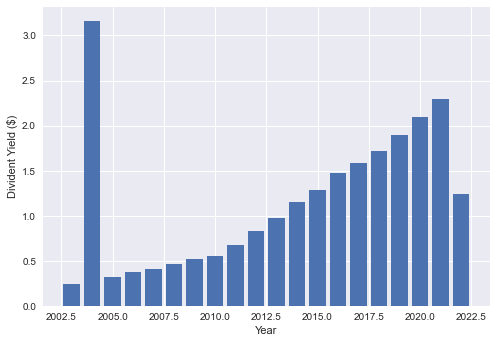

In [89]:
df = msft.dividends
print(type(df))
# print(df)
data = df.resample('Y').sum()
# print(data)
data = data.reset_index()
# print(data)
data['Year'] = data['Date'].dt.year
# print(data)

# plot it
plt.figure()
plt.bar(data['Year'], data['Dividends'])
plt.ylabel('Divident Yield ($)')
plt.xlabel('Year')
plt.show()


https://youtu.be/9nB__kJio-M

In [90]:
history = msft.history(period='max')
print(type(history))
print('------------------')
print(history.head(4))
print(history.tail(4))


<class 'pandas.core.frame.DataFrame'>
------------------
                Open      High       Low     Close      Volume  Dividends  \
Date                                                                        
1986-03-13  0.055654  0.063838  0.055654  0.061109  1031788800        0.0   
1986-03-14  0.061109  0.064383  0.061109  0.063292   308160000        0.0   
1986-03-17  0.063292  0.064929  0.063292  0.064383   133171200        0.0   
1986-03-18  0.064383  0.064929  0.062201  0.062746    67766400        0.0   

            Stock Splits  
Date                      
1986-03-13           0.0  
1986-03-14           0.0  
1986-03-17           0.0  
1986-03-18           0.0  
                  Open        High         Low       Close    Volume  \
Date                                                                   
2022-06-07  266.640015  273.130005  265.940002  272.500000  22860700   
2022-06-08  271.709991  273.000000  269.609985  270.410004  17372300   
2022-06-09  267.779999  272.70

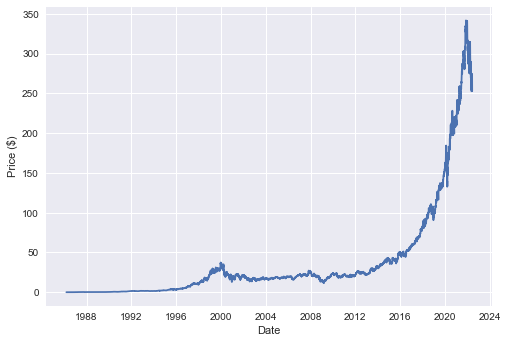

In [91]:
plt.figure()
plt.plot(history['Close'])
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()

In [92]:
today = datetime.now().date().strftime('%Y-%m-%d')
print(today)
history = msft.history(start='2020-01-01', end=today)

2022-06-12


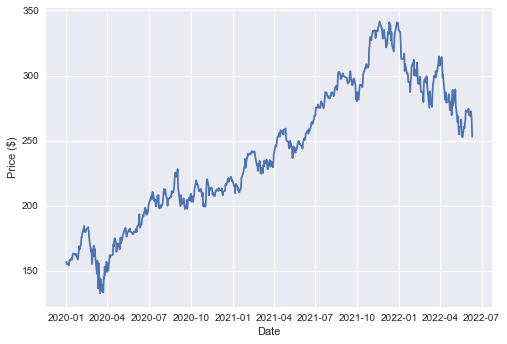

In [93]:
plt.figure()
plt.plot(history['Close'])
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()

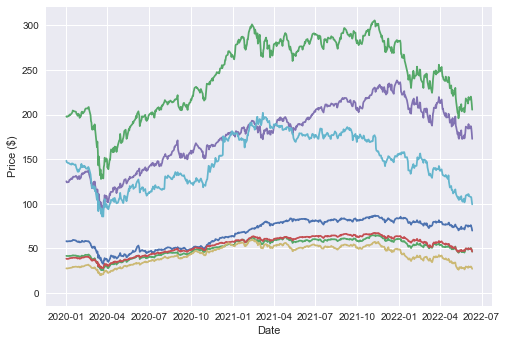

In [94]:
# lets get close values of a list of securities
securities = ['ARGFX', 'RYBHX', 'PRGSX', 'VITAX', 'DFDIX', 'DIS', 'SPAXX', 'VBK']
secDF = pd.DataFrame()

for security in securities:
    secDF[security] = yf.Ticker(security).history(start='2020-01-01', end=today)['Close']

plt.figure()
plt.plot(secDF)
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()